# Ausgabe von Raumkurven mit Python

__Manfred Brill, Hochschule Kaiserslautern__

## Raumkurven
Wie schon für ebene Parameterkurven bietet es sich auch für Raumkurven an ein Modul zu implementieren, in dem wir die einzelnen Kurven sammeln.
Um das Jupyter Notebook unabhängig zu halten definieren wir die Funktionen für die Berechnung von Punkten auf einer Helix oder einer Schraubenlinie
über der logarithmischen Spirale in diesem Notebook.

Wir verwenden Keyword-Parameter und als Resultat der Funktionen erhalten wir drei NumPy-Arrays für x, y und z-Koordinaten von Punkten auf der Raumkurve.

In [3]:
import numpy as np


def helix(radius=1.0, h=2.0, left=0.0, right=1.0, num=200):
    t = np.linspace(left, right, num)
    x = radius * np.cos(2.0 * np.pi * t)
    y = radius * np.sin(2.0 * np.pi * t)
    z = h * t
    return x, y, z


def logSpiralHelix(a=2.0, b=0.08, h=1.0, left=0.0, right=8.0*np.pi, n=200):
    t = np.linspace(left, right, n)
    r = a * np.exp(b*t)
    x = r * np.cos(t)
    y = r * np.sin(t)
    z = h * t
    return x, y, z

In [7]:
x, y, z = helix(right=2.0)

## Grafische Ausgabe
Nachdem wir einen Polygonzug berechnet haben können wir sowohl mit Matplotlib als auch mit Plotly dreidimensionale Darstellungen erstellen. In Matplotlib ist dies im ersten Schritt eine statische Darstellung mit einer festen Kameraeinstellung. Mit Hilfe von *magic commands* können wir aber interaktive Darstellungen erzeugen. In Plotly ist dies noch einfacher, wir schon vorher erhalten wir eine interaktive Darstellung von vorn herein.

Als Beispiel verwenden wir die Helix mit einer Ganghähe von 2 und davon einen Umlauf. Dazu berechnen wir den Polygonzug und verwenden diese Daten für die grafische Ausgabe mit Matplotlib und Plotly.


### Matplotlib
Die Darstellung einer Raumkurve unterscheidet sich nicht sehr stark von der für eine ebene Parameterkurve. Die Funktion *pyplot.plot* kann auch drei Koordinaten verarbeiten. Eine räumliche Darstellung in Matplotlib erhalten wir mit der Anweisung *ax = plt.axes(projection='3d')*.

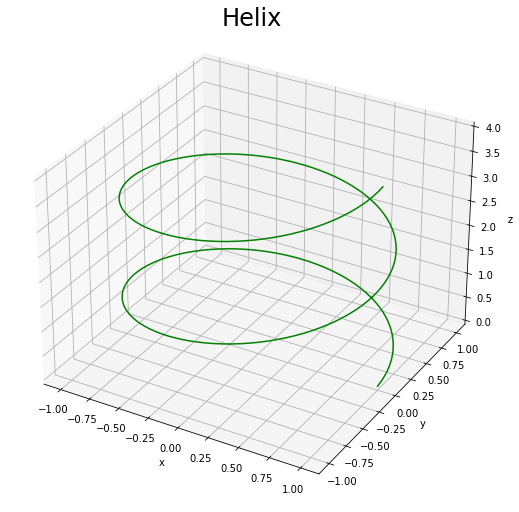

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16.0, 9.0))
ax = plt.axes(projection='3d')

plt.title('Helix',
          y=1.05, fontsize=24)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.plot(x, y, z, 'g')

plt.show()

Wir können die grafische Ausgabe und viele andere Darstellungen in Matplotlib mit *magic commands* beeinflussen. Mit Hilfe von *%matplotlib qt* erhalten wir grafische ausgaben in einem externen Fenster. Verwenden wir dies und verwenden erneut den Code für die grafische Ausgabe der Helix, dann öffnet sich ein Fenster und wir können die 3D-Ansicht wie gewohnt mit der Maus manipulieren.

In [14]:
 %matplotlib qt

fig = plt.figure(figsize=(16.0, 9.0))
ax = plt.axes(projection='3d')

plt.title('Helix',
          y=1.05, fontsize=24)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.plot(x, y, z, 'g')

plt.show()

### Plotly

Mit Plotly erhalten wir ohne großen Aufwand eine interaktive 3D-Darstellung.
Wir erstellen anschließend einen Trace für das Modul
*plotly.graph_objects*. 
Diesen fügen wir in *go.Figure* der Ausgabe hinzu und
stellen noch einige Einstellungen wie Bildgröße oder Kameraposition ein.
Den Polygonzug geben wir mit *go.Scatter3d* aus.

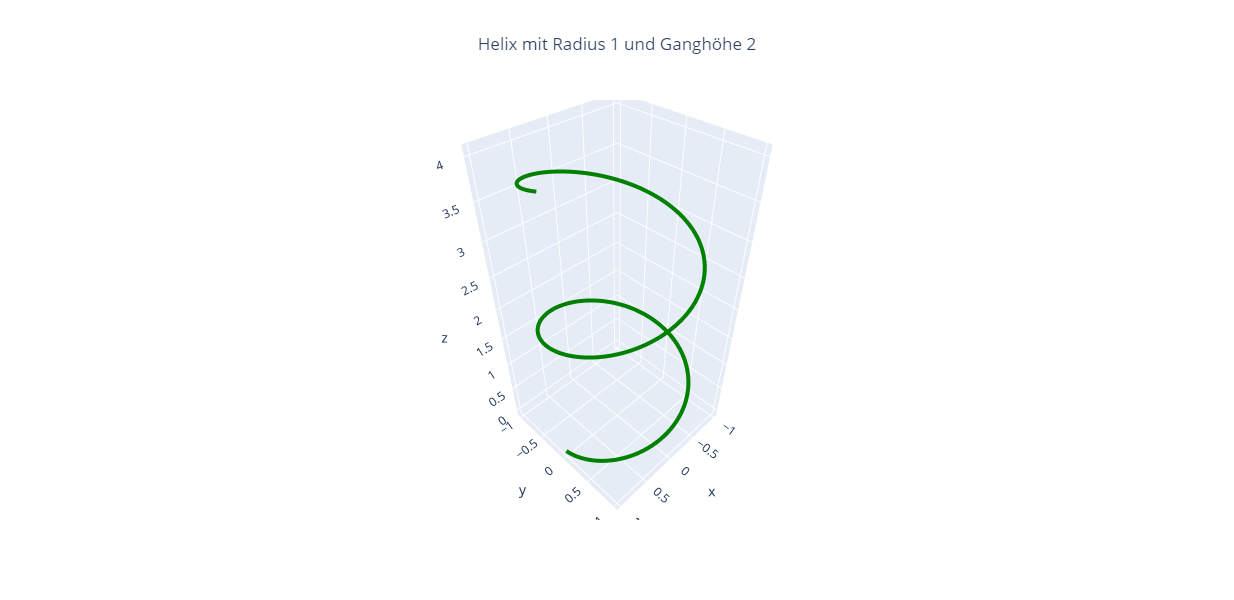

In [15]:
import plotly.graph_objects as go
import plotly.io as pio


pio.renderers.default = 'notebook_connected+jupyterlab'

curve = go.Scatter3d(x=x, 
                     y=y, 
                     z=z,
                     name='Helix',
                     mode='lines',
                     line = dict(color='green', width=8),
                     showlegend=False)

layout = go.Layout(scene_xaxis_visible=True, 
                   scene_yaxis_visible=True, 
                   scene_zaxis_visible=True,
                   showlegend=False)

fig =  go.Figure(data=[curve], layout=layout)

fig.update_layout(title='Helix mit Radius 1 und Ganghöhe 2',
                  title_x=0.5,
                  scene_camera_eye_z=1.55,
                  autosize=False,
                  width=800,
                  height=600,)


fig.show()

Die Helix ist eine Schraubenlinie, die auf einem Zylindermantel abläuft. In Plotly können wir geometrische Körper als 
Objekte vom Typ *parametrized surface* ausgeben. Dazu berechnen wir in der Funktion *cylinder* ein Dreiecksnetz eines Zylinders und üergeben das anschließend
an Plotly. Für den Boden und den Deckel erzeugen implementieren wir die Funktino *disk*, die ein Dreiecks-Netz für diese Kreisscheiben berechnet.

In [18]:
def cylinder(r=1.0, h=2.0, nu=100, nv=5):
    theta = np.linspace(0, 2*np.pi, nu)
    v = np.linspace(0.0, h, nv )
    theta, v = np.meshgrid(theta, v)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    z = v
    return x, y, z


def circle_in_space(r=1.0, height=0.0, nt=100):
    theta = np.linspace(0, 2*np.pi, nt)
    x= r*np.cos(theta)
    y = r*np.sin(theta)
    z = np.full_like(theta, fill_value = height)
    return x, y, z

Jetzt verwenden wir diese Funktionen und erzeugen eine grafische Ausgabe.

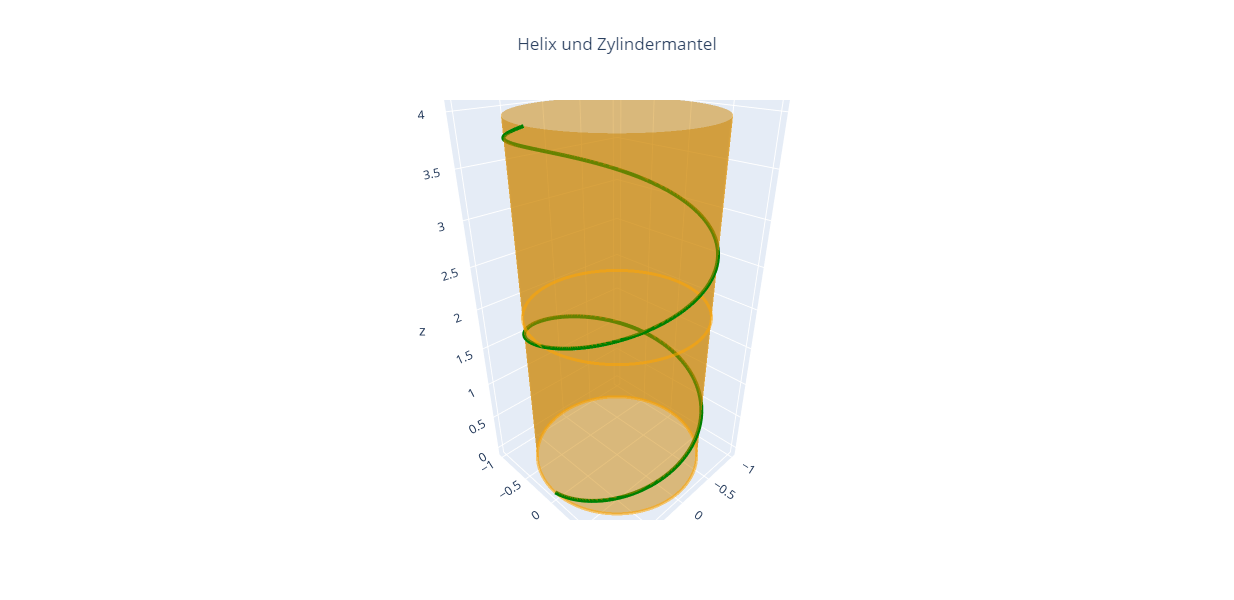

In [20]:
h = 2.0
x1, y1, z1 = cylinder(h=4.0)

colorscale = [[0, 'orange'],
             [1, 'orange']]

cyl = go.Surface(x=x1, 
                 y=y1, 
                 z=z1,
                 name='Zylindermantel',
                 colorscale = colorscale,
                 opacity=0.5,
                 showscale=False)

xb, yb, zb = circle_in_space(height=0.0)
xd, yd, zd = circle_in_space(height=h)

boden = go.Scatter3d(x = xb,
                     y = yb,
                     z = zb,
                     mode ='lines',
                     line = dict(color='orange', width=6),
                     opacity =0.55
                    )


deckel = go.Scatter3d(x = xd,
                      y = yd,
                      z = zd,
                      mode ='lines',
                      line = dict(color='orange', width=6),
                      opacity =0.55
                     )

curve = go.Scatter3d(x=x, 
                     y=y, 
                     z=z,
                     name='Helix',
                     mode='lines',
                     line = dict(color='green', width=8)
                    )

fig =  go.Figure(data=[curve, cyl, boden, deckel], layout=layout)

fig.update_layout(title='Helix und Zylindermantel',
                  title_x=0.5,
                  scene_camera_eye_z=1.0,
                  autosize=False,
                  width=800,
                  height=600
                 )


fig.show()

## Schraubenlinie über einer logarithmischen Spirale
Wenn wir eine andere Raumkurve, zum Beispiel eine Schraubenlinie über einer logarithmischen Spirale, ausgeben möchten, dass müssen wir im Quelltext nicht viel verändern. Wir berechnen
die Koordinaten der Punkte auf der Spur mit der entsprechenden Funktion und geben den Polygonzug aus. Für die Spirale verwenden wir die Defaultwerte a=1 und b=0.08 für die Parameter der Spirale, als Ganghöhe verwenden wir 1. Das Parameterintervall ist [0, 6pi] und wir verwenden 200 Punkte für den Polygonzug.

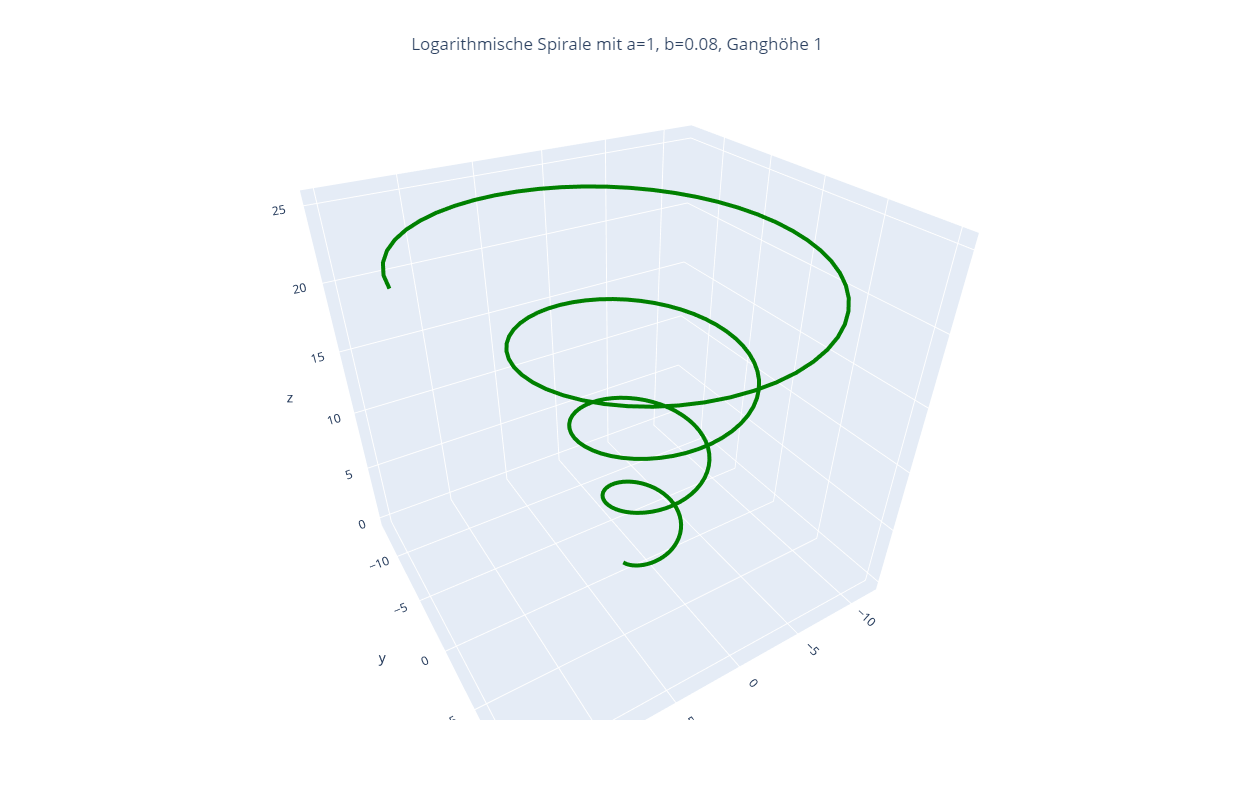

In [18]:
x, y, z = logSpiralHelix()

curve = go.Scatter3d(x=x, y=y, z=z,
                     name='Logarithmische Spirale',
                     mode='lines',
                     line = dict(color='green', width=8),
                     showlegend=False)

layout = go.Layout(scene_xaxis_visible=True, 
                   scene_yaxis_visible=True, 
                   scene_zaxis_visible=True,
                   showlegend=False)

fig =  go.Figure(data=[curve], layout=layout)

fig.update_layout(title='Logarithmische Spirale mit a=1, b=0.08, Ganghöhe 1',
                  title_x=0.5,
                  scene_camera_eye_z=1.55,
                  autosize=False,
                  width=800,
                  height=800,
                  showlegend=False)
                  
fig.show()